In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Checking the train.csv file 

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/Colab Notebooks/HappyWhale/train_data_sample.csv'
data_sample = pd.read_csv(path)
data_sample

,image,species,individual_id,speciesv2
0,6683d80c1959e3.jpg,bottlenose_dolphin,4b8534134eb8,dolphin
1,2238b609533863.jpg,gray_whale,80d282ac5d45,whale
2,d6c5ca6001c910.jpg,beluga,617368452785,beluga
3,8cb9be04270854.jpg,dusky_dolphin,0eb252b85dc0,dolphin
4,2f5923f7aa8f37.jpg,blue_whale,e82a1c06b910,whale
...,...,...,...,...
495,a57d922da74d3e.jpg,humpback_whale,b2a4a87ffb86,whale
496,32d6b705eab7b5.jpg,humpback_whale,03c879f7c6d5,whale
497,7921becb3753c5.jpg,gray_whale,20312a4e3881,whale
498,199e168b341d48.jpg,spinner_dolphin,33f106fc9744,dolphin


### Load data images from local repo

In [ ]:
from os import listdir

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/HappyWhale/train_sample_image/"
#images_list = listdir(path)

In [ ]:
images_list = list(data_sample['image'])

In [ ]:
# This block code includes a resizing step

loaded_images = []
for image in images_list[::]:   ### change this value for a subsample only ###
    
    img = mpimg.imread(path + image)
    img = cv2.resize(img, dsize=(256, 256), interpolation= cv2.INTER_LINEAR)
    loaded_images.append(np.array(img))

In [ ]:
print(type(loaded_images))
print(len(loaded_images))

<class 'list'>
500


In [ ]:
loaded_images[3].shape

(256, 256, 3)

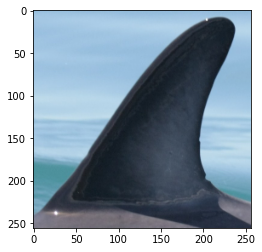

In [ ]:
#Image was re-sized 256,256
plt.imshow(loaded_images[3], cmap='gray') ### modify the index to show another image ###

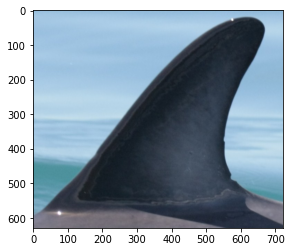

In [ ]:
#Same image before re-sizing
link = path+images_list[3] ### modify the index to show another image ###
previous_image = mpimg.imread(link)
plt.imshow(previous_image, cmap='gray')

### Making sure all the images are in RGB format

In [ ]:
# Code a function which will detect the index of B&W images
list_index_bw = []
list_len = []
for index,img in enumerate(loaded_images):
    if len(img.shape) != 3:
        list_index_bw.append(index)
        list_len.append(len(img.shape))

In [ ]:
list_index_bw

[7, 9, 23, 83, 99, 124, 188, 191, 212, 219, 263, 323, 337, 424, 483, 489]

In [ ]:
list_len

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

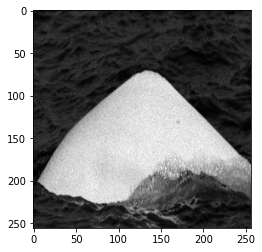

In [ ]:
#Image in greyscale format
plt.imshow(loaded_images[7], cmap='gray')  ### modify the index to show another image ###

In [ ]:
# Shape of B&W image
loaded_images[7].shape ### modify the index to select another image ###

(256, 256)

In [ ]:
# How many images are in B&W?
len(list_index_bw)

16

In [ ]:
#Code a function which will convert B&W image into RGB image
for i in list_index_bw:
    loaded_images[i] = np.stack((loaded_images[i],)*3, axis=-1)

In [ ]:
# Shape of RGB-newly converted image
loaded_images[7].shape

(256, 256, 3)

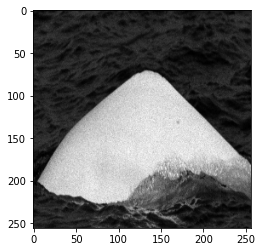

In [ ]:
#Same image in RGB format
plt.imshow(loaded_images[7], cmap='gray')

### Defining X

In [ ]:
# Conver the list of images into a np ndarray
X = np.array(loaded_images)

In [ ]:
X.shape

(500, 256, 256, 3)

### Defining y

In [ ]:
classes = {'whale':0, 'dolphin':1, 'beluga':2}

In [ ]:
#Add a new column 'class' on data_sample df
data_sample['class'] = data_sample['speciesv2'].map(classes)

In [ ]:
data_sample

,image,species,individual_id,speciesv2,class
0,6683d80c1959e3.jpg,bottlenose_dolphin,4b8534134eb8,dolphin,1
1,2238b609533863.jpg,gray_whale,80d282ac5d45,whale,0
2,d6c5ca6001c910.jpg,beluga,617368452785,beluga,2
3,8cb9be04270854.jpg,dusky_dolphin,0eb252b85dc0,dolphin,1
4,2f5923f7aa8f37.jpg,blue_whale,e82a1c06b910,whale,0
...,...,...,...,...,...
495,a57d922da74d3e.jpg,humpback_whale,b2a4a87ffb86,whale,0
496,32d6b705eab7b5.jpg,humpback_whale,03c879f7c6d5,whale,0
497,7921becb3753c5.jpg,gray_whale,20312a4e3881,whale,0
498,199e168b341d48.jpg,spinner_dolphin,33f106fc9744,dolphin,1


In [ ]:
# Encoding class in categories
from tensorflow.keras.utils import to_categorical


num_classes = 3
y = to_categorical(data_sample['class'])
len(y)

500

### Train/Val/Test split

Use the following method to create X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [ ]:
first_split = int(len(loaded_images) /6.)
second_split = first_split + int(len(loaded_images) * 0.2)
X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]

In [ ]:
print (len(X_test), len(X_val), len(X_train))

83 100 317


In [ ]:
print (len(y_test), len(y_val), len(y_train))

83 100 317


### A CNN architecture, using a pre-trained CNN = Transfer learning

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    
    return model

**Look at the architecture of the model using .summary()**

In [ ]:
model = load_model()
model.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

💪 Impressive, right? Two things to notice:
- It ends with a combo Conv2D/MaxPooling2D 
- The `layers.Flatten` and the `layers.Dense` are not here yet, we need to add them.
- There are more than 14.000.000 parameters, which is a lot... 
    - We could fine-tune them, i.e. update them as we will update the weights of the dense layers, but it will take a lot of time....
    - For this reason, we will inform the model that the layers until the flattening will be set non-trainable.

**Deactivating the training of the VGG16 paramters** 

* Write a first function which:
    - takes the previous model as the input
    - sets the first layers to be non-trainable, by applying **`model.trainable = False`**
    - returns the model.

* Then inspect the summary of the model to check that the parameters are no longer trainable, they were set to be  **`non-trainable`**.

In [ ]:
def set_nontrainable_layers(model):
    
    # Set the first layers to be untrainable
    model.trainable = False
    
    return model

In [ ]:
model = set_nontrainable_layers(model)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

**Chaining the pretrained convolutional layers of VGG16 with our own dense layers**

We will write a function that adds flattening and dense layers after the convolutional layers. 

In [ ]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten() ### modify this
    dense_layer = layers.Dense(500, activation='relu') ### modify this
    prediction_layer = layers.Dense(3, activation='softmax') ### modify this
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

**Inspect the parameters of a customized VGG16**

In [ ]:
model = add_last_layers(model)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 500)               16384500  
                                                                 
 dense_1 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 31,100,691
Trainable params: 16,386,003
Non-trainable params: 14,714,688
_________________________________________________________________


**Building a function that creates a full customized VGG16 and compiles it**

In [ ]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4) #>>> We advise the adam optimizer with learning_rate=1e-4
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy']) #>>> To modify it ?
    return model
    # $CHALLENGIFY_END

### Back to the data

🚨 The VGG16 model was trained on images which were preprocessed in a specific way. This is the reason why we did _NOT_ normalize them earlier.

Apply the specific processing to the original (non-normalized) images here using the method **`preprocess_input`** that you can import from **`tensorflow.keras.applications.vgg16`**

📚 Cf. [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

### Fit the model

**Training the customized VGG16**

* Train the model with an Early stopping criterion on the validation accuracy -
* Since the validation data are provided, therefore use `validation_data` instead of `validation_split`.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = build_model()

es = EarlyStopping(monitor = 'val_loss', #>>> shall we modify this ?
                   mode = 'auto', #>>> not sure what is that?
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

Epoch 1/50
20/20 [==============================] - 21s 469ms/step - loss: 4.6879 - accuracy: 0.6498 - val_loss: 4.0434 - val_accuracy: 0.7300
Epoch 2/50
20/20 [==============================] - 5s 271ms/step - loss: 0.8018 - accuracy: 0.9306 - val_loss: 4.7708 - val_accuracy: 0.7800
Epoch 3/50
20/20 [==============================] - 5s 272ms/step - loss: 0.1415 - accuracy: 0.9748 - val_loss: 4.9140 - val_accuracy: 0.7900
Epoch 4/50
20/20 [==============================] - 5s 273ms/step - loss: 0.0743 - accuracy: 0.9905 - val_loss: 3.7098 - val_accuracy: 0.7800
Epoch 5/50
20/20 [==============================] - 5s 271ms/step - loss: 0.0873 - accuracy: 0.9874 - val_loss: 5.5168 - val_accuracy: 0.7800
Epoch 6/50
20/20 [==============================] - 5s 269ms/step - loss: 2.6898e-06 - accuracy: 1.0000 - val_loss: 5.5557 - val_accuracy: 0.7600
Epoch 7/50
20/20 [==============================] - 5s 269ms/step - loss: 2.0762e-05 - accuracy: 1.0000 - val_loss: 5.6103 - val_accuracy: 0.75

### Looking at the history

### Evaluating the model

In [ ]:
res_vgg = model.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]


print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

# print(f"test_accuracy = {round(test_accuracy,2)*100} %")

# print(f'Chance level: {1./num_classes*100:.1f}%')

3/3 [==============================] - 10s 2s/step - loss: 2.0473 - accuracy: 0.9036
test_accuracy_vgg = 90.0 %


### Improve the model

## (6) (Optional) Improve the model

In [ ]:
#(6.1) Data augmentation

# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     featurewise_center = False,
#     featurewise_std_normalization = False,
#     rotation_range = 20,
#     width_shift_range = 0.2,
#     height_shift_range = 0.2,
#     horizontal_flip = True,
#     brightness_range = (0.5, 1.),
#     zoom_range = (0.3, 1.5)) # delete it ?


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)

# model_data_aug = build_model()

# train_flow = datagen.flow(X_train, y_train, batch_size=16)
# val_flow = datagen.flow(X_val, y_val, batch_size=16)

# es = EarlyStopping(monitor = 'val_loss', 
#                    mode = 'auto', 
#                    patience = 5, 
#                    verbose = 1, 
#                    restore_best_weights = True)

# history_data_aug = model_data_aug.fit(train_flow,
#                                       validation_data = val_flow, 
#                                       epochs = 50,
#                                       callbacks = [es])

In [ ]:
# plt.plot(history_data_aug.history['accuracy'])
# plt.plot(history_data_aug.history['val_accuracy'])
# plt.show()

In [ ]:
# res_aug = model_data_aug.evaluate(X_test, y_test)

In [ ]:
# test_accuracy_aug = res_aug[-1]


# print(f"test_accuracy_aug = {round(test_accuracy_aug,2)*100} %")

# print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

# print(f"test_accuracy = {round(test_accuracy,2)*100} %")

# print(f'Chance level: {1./num_classes*100:.1f}%')

##Visualize Output Layers

In [ ]:
from tensorflow.keras.preprocessing import image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


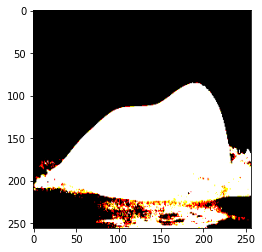

img tensor shape (1, 256, 256, 3)


In [ ]:
img_test = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HappyWhale/beluga.jpg')
img_test = cv2.resize(img, dsize=(256, 256), interpolation= cv2.INTER_LINEAR)
img_test = image.img_to_array(img_test)
img_test = preprocess_input(img_test)
img_test = np.expand_dims(img_test, axis=0)
plt.imshow(img_test[0])
plt.show()
print("img tensor shape",img_test.shape)

In [ ]:
layer_names = [layer.name for layer in model.layers]
layer_names

['vgg16', 'flatten_1', 'dense_2', 'dense_3']

In [ ]:
model.layers

In [ ]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 8, 8, 512) dtype=float32 (created by layer 'block5_pool')>,
 <KerasTensor: shape=(None, 32768) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 500) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_3')>]

In [ ]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue

In [ ]:
# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

dense_3 (500, 3)


In [ ]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

553476096/553467096 [==============================] - 12s 0us/step
block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [ ]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

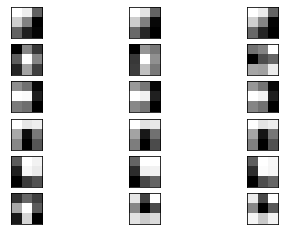

In [ ]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

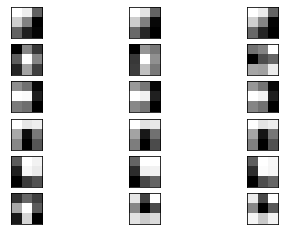

In [ ]:
# cannot easily visualize filters lower down
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [ ]:
# summarize feature map size for each conv layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [ ]:
# redefine model to output right after the first hidden layer
from tensorflow.keras import Model
from keras.preprocessing.image import load_img

model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [ ]:
# load the image with the required shape
img = load_img('/content/drive/MyDrive/Colab Notebooks/HappyWhale/beluga.jpg', target_size=(224, 224))

In [ ]:
# convert the image to an array
from keras.preprocessing.image import img_to_array

img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

In [ ]:
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

In [ ]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

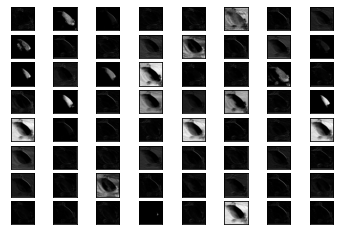

In [ ]:
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


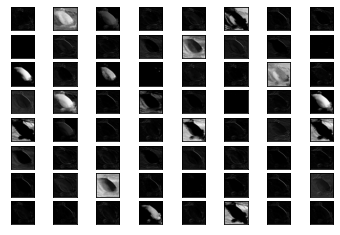

In [ ]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('/content/drive/MyDrive/Colab Notebooks/HappyWhale/beluga.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [ ]:
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i+1].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
model.summary()

In [ ]:
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

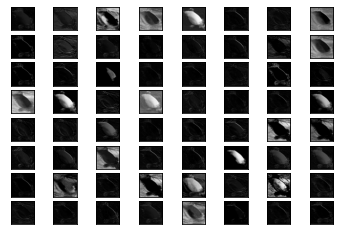

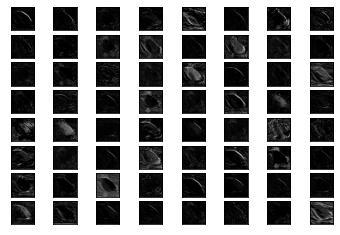

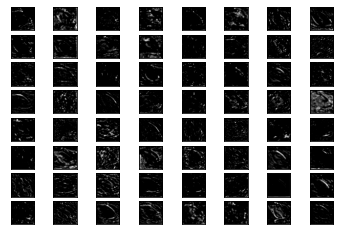

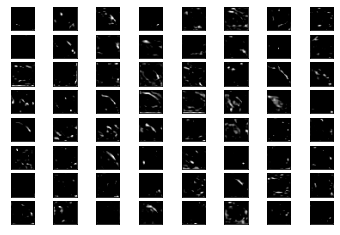

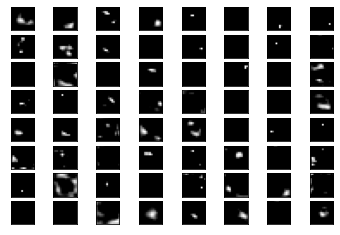

In [ ]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/drive/MyDrive/Colab Notebooks/HappyWhale/beluga.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

## Visualize with Grad-CAM

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
# cv2.imshow does not work on Google Colab notebooks, which is why we are using cv2_imshow instead
from google.colab.patches import cv2_imshow 


In [ ]:
model = VGG16(weights='imagenet')

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
ORIGINAL = '/content/drive/MyDrive/Colab Notebooks/HappyWhale/beluga.jpg'

DIM = 224

img = image.load_img(ORIGINAL, target_size=(DIM, DIM))

cv2_imshow(cv2.imread(ORIGINAL)) # Visualize image

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(decode_predictions(preds))

[[('n02074367', 'dugong', 0.32998553), ('n02066245', 'grey_whale', 0.26342458), ('n01484850', 'great_white_shark', 0.11985469), ('n02134084', 'ice_bear', 0.07708503), ('n02077923', 'sea_lion', 0.03992663)]]


In [ ]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('block5_conv3')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

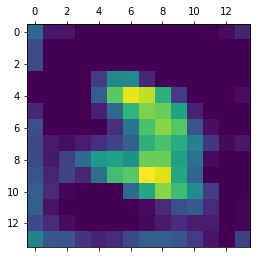

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((14, -1))
plt.matshow(heatmap)
plt.show()

In [ ]:
img = cv2.imread(ORIGINAL)

In [ ]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY + img

In [ ]:
cv2_imshow(cv2.imread(ORIGINAL))
cv2_imshow(img)

dugong


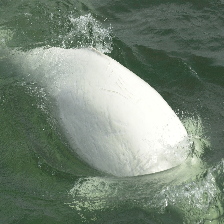

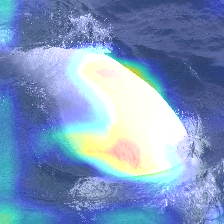

killer_whale


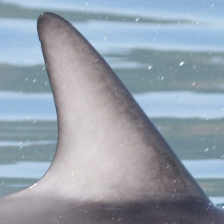

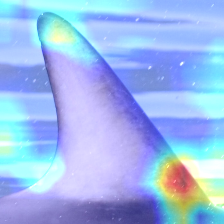

grey_whale


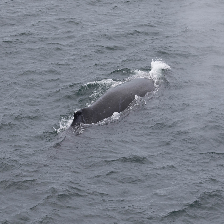

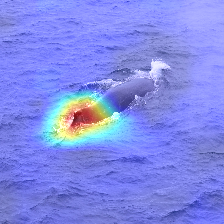

In [ ]:

def gradCAM(orig, intensity=0.5, res=224):
  img = image.load_img(orig, target_size=(DIM, DIM))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  print(decode_predictions(preds)[0][0][1]) # prints the class of image

  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('block5_conv3')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((14, -1))

  img = cv2.imread(orig)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

  img = heatmap * intensity + img

  cv2_imshow(cv2.resize(cv2.imread(orig), (res, res)))
  cv2_imshow(cv2.resize(img, (res, res)))

gradCAM("/content/drive/MyDrive/Colab Notebooks/HappyWhale/beluga.jpg")
gradCAM("/content/drive/MyDrive/Colab Notebooks/HappyWhale/dolphin.jpg")
gradCAM("/content/drive/MyDrive/Colab Notebooks/HappyWhale/whale.jpg")